# CS 316: Introduction to Deep Learning
# Lab Exam - Fall 2023
# Dr. Abdul Samad
Total Duration: 3 Hours <br/>
Total Points: 100 <br/>
Name: **Write your Name Here** <br/>
ID: **Write your Student ID** <br/>



# Instructions
1. Google Colab must be used for this exam.
2. You are not permitted to utilize the internet or any other source for this exam.
3. Any violation shall be treated as a  plagiarism  case.
4. The error in one task will not carry to other tasks.
5. The marks for each task are stated explicitly.
6. Please carefully study the questions; they are self-explanatory.
7. Rename your file as `Lab_Exam_aa01234.ipynb` where `aa01234` will be replaced by your student id.
8. The total duration for their exam is 3 hours whereas the last 15 minutes are for submission.

# Exam Overview

In this Exam, we are implementing a neural network with 3-hidden layers and we will be using it to compute the progression of diabetes. Since each example in the dataset has 10 attributes, the input vector will be of size 10.
<center>
<img src='https://i.postimg.cc/D048Gkbm/image.png' alt="drawing" width="400" />
<center/>



The neural network is defined as follows:
$$ \mathbf{z}_1 = \mathbf{W}_1 \mathbf{X} + \mathbf{b}_1 \tag{1.1} $$
$$ \mathbf{a}_1 = ReLU(\mathbf{z_1}) \tag{1.2}$$
$$ \mathbf{z}_2 = \mathbf{W}_2 \mathbf{a_1} + \mathbf{b}_2 \tag{1.3}$$
$$ \mathbf{a}_2 = Tanh(\mathbf{z_2}) \tag{1.4}$$
$$ \mathbf{z}_3 = \mathbf{W}_3 \mathbf{a_2} + \mathbf{b}_3 \tag{1.5}$$
$$ \mathbf{a}_{3} = ReLU(\mathbf{z_3}) \tag{1.6}$$
$$ \mathbf{z}_{4} = \mathbf{W}_4\mathbf{a_3} + \mathbf{b}_4 \tag{1.7}$$
$$ \mathbf{a}_{4} = \mathbf{z}_4 \tag{1.8}$$
$$ \mathbf{\hat{y}} = \mathbf{W}_4\mathbf{a_4} + \mathbf{b}_4  \tag{1.}$$
$$ L^{(i)} = (\mathbf{y}^{(i)} - \mathbf{\hat{y}}^{(i)})^2 \tag{1.10}$$
$$ J =\frac{1}{m} \sum_{i=1}^{m} L^{(i)} \tag{1.11}$$



# Setup

In [1]:
# DO NOT EDIT
# Import necessary libraries
# Import the NumPy library for numerical operations.
import numpy as np
# Import the Pandas library for data manipulation and analysis.
import pandas as pd
# Import the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Import the Seaborn library for data visualization
import seaborn as sns
# Import the datasets module from scikit-learn, a machine learning library.
from sklearn import datasets
from sklearn.datasets import load_diabetes
# Import the StandardScaler for feature scaling.
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Diabetes Progression Dataset


Let us import the dataset & create a dataframe

In [2]:
# DO NOT EDIT
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


Let us learn more about the dataset

In [3]:
# DO NOT EDIT
# Print the description of the dataset
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Checking the Feature Names

In [4]:
# DO NOT EDIT
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Checking the shape of data

In [5]:
# DO NOT EDIT
diabetes.data.shape

(442, 10)

There are 10 variables & 442 instances/rows

In [6]:
# DO NOT EDIT
diabetes.target.shape

(442,)

The Target Variable has 442 rows

Let us Create a Dataframe using this data

In [7]:
# DO NOT EDIT
db_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

Display a random sample of 5 rows from the DataFrame


In [8]:
# DO NOT EDIT
db_df.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
334,-0.060003,0.050680,-0.047163,-0.022885,-0.071743,-0.057681,-0.006584,-0.039493,-0.062917,-0.054925
77,-0.096328,-0.044642,-0.036385,-0.074527,-0.038720,-0.027618,0.015505,-0.039493,-0.074093,-0.001078
436,-0.056370,-0.044642,-0.074108,-0.050427,-0.024960,-0.047034,0.092820,-0.076395,-0.061176,-0.046641
376,-0.001882,-0.044642,0.068163,-0.005670,0.119515,0.130208,-0.024993,0.086708,0.046133,-0.001078
241,0.030811,0.050680,-0.008362,0.004658,0.014942,0.027496,0.008142,-0.008127,-0.029526,0.056912


Add Dependent Variable to the dataset

In [9]:
# DO NOT EDIT
db_df['Progression'] = diabetes.target

Display a random sample of 5 rows from the DataFrame


In [10]:
# DO NOT EDIT
db_df.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
178,0.041708,-0.044642,-0.008362,-0.026328,0.024574,0.016222,0.070730,-0.039493,-0.048359,-0.030072,81.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
173,-0.063635,0.050680,-0.079497,-0.005670,-0.071743,-0.066449,-0.010266,-0.039493,-0.018114,-0.054925,101.0
82,-0.016412,-0.044642,-0.035307,-0.026328,0.032830,0.017162,0.100183,-0.039493,-0.070209,-0.079778,52.0
43,0.019913,-0.044642,-0.023451,-0.071085,0.020446,-0.010082,0.118591,-0.076395,-0.042571,0.073480,92.0


Let us visualize the Linear correlation between the variables in the dataframe by plotting a heatmap.

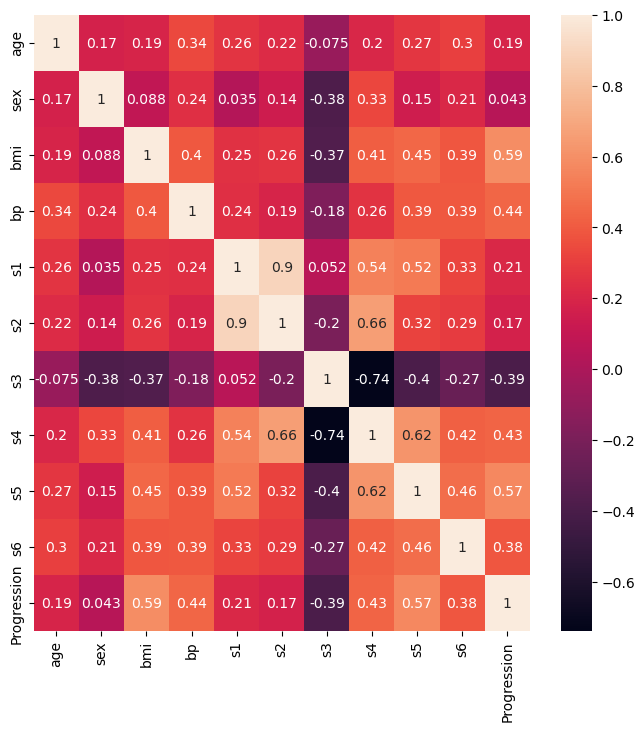

In [11]:
# DO NOT EDIT
plt.subplots(figsize=(8,8))
sns.heatmap(db_df.corr(),annot=True)
plt.show()

# Data Modelling

In [12]:
# DO NOT EDIT
# Independent variables / explanatory variables
# Axis=1 means we drop data by column.
X = db_df.drop(labels='Progression', axis=1).values
# Dependent variable / response / target variable.
Y = db_df['Progression'].values
# Reshape the target variable
Y = Y.reshape(len(Y),1)
print(X.shape,Y.shape)

(442, 10) (442, 1)


# [10 Points] Task 01 - Train Test Split

In Task 01, you are required to the implement the function `train_test_split` which splits the datasets into train and test set.

**Hint: Use `rng.shuffle` or `rng.permutation` to shuffle the dataset. Furthermore, instead of shuffling the dataset, shuffle the indexes.**

In [13]:
#TODO: Implement the function train_test_split
def train_test_split(inputs,outputs,test_size,seed = 0):
    """
    Splits the data into training and test sets.
    Return 4 numpy arrays. X_train, X_test, Y_train, Y_test
    where training data is test_size proportion of data provided.

    Args:
        inputs [np.array] : numpy array of input data
        outputs [np.array]: numpy array of output labels
        test_size [float]: proportion of data to be used as test data. e.g. 0.2 means 20% of data is used for test data.
        seed [int]: A seed to create random number generator. (For reproducability)
    """

    rng = np.random.default_rng(seed)
    assert(len(inputs) == len(outputs))
    assert(test_size <= 1.0)
    assert(test_size >= 0.0)
    num_samples = len(inputs)
    num_train = int(num_samples * (1.0 - test_size))
    # Write your code here
    indices = np.arange(num_samples)
    rng.shuffle(indices)
    train_indices = indices[:num_train]
    test_indices = indices[num_train:]
    X_train = inputs[train_indices]; X_test = inputs[test_indices]
    Y_train = outputs[train_indices]; Y_test = outputs[test_indices]

    return X_train, X_test, Y_train, Y_test

In [14]:
# DO NOT EDIT
# Test Case to check Train Test Split
np.random.seed(1)
x = np.random.randn(15,2)
y = np.random.randn(15)
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
assert np.allclose (X_train,np.array([[ 0.86540763, -2.3015387 ],[ 0.90159072,  0.50249434],[ 1.74481176, -0.7612069 ],[-1.10061918,  1.14472371],[ 1.62434536, -0.61175641],[ 0.3190391 , -0.24937038],[ 1.13376944, -1.09989127],[ 1.46210794, -2.06014071],[-0.26788808,  0.53035547],[ 0.90085595, -0.68372786],[-0.3224172 , -0.38405435],[ 0.04221375,  0.58281521]]))
assert np.allclose (X_test,np.array([[-0.12289023, -0.93576943],[-0.17242821, -0.87785842],[-0.52817175, -1.07296862]]))
assert np.allclose (Y_train,np.array([-0.6871727 , -0.88762896, -0.84520564, -0.19183555, -0.69166075,-0.67124613,  0.2344157 , -0.0126646 ,  0.05080775, -0.74715829,-1.11731035,  0.74204416]))
assert np.allclose (Y_test, np.array([ 1.6924546 ,  1.65980218, -0.39675353]))


(12, 2) (3, 2) (12,) (3,)


The expected output is as follows:

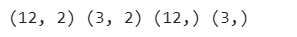



# [10 Points] Task 02 -  Activation Functions

**In this task, you will be implementing the Tanh and LeakyReLU by completing the `Tanh` and `LeakyReLU` classes.**

## [5 Points]  Part A - LeakyReLU Activation Function

The LeakyReLU activation function and its dervivative are defined as  follows:
$$ f(z) = \begin{cases}
 z &  z > 0 \\
\alpha · z & z \leq 0 \\
\end{cases} \tag{2.1} $$
$$ f^{\prime}(z) = \begin{cases}1 & z > 0 \\\alpha & z \leq 0 \\
\end{cases}
\tag{2.2}
$$

In [15]:
#TODO: Implement the  LeakyReLU class which implements the LeakyReLU activation function.
class LeakyReLU:
  """
  Implements the LeakyReLU activation
  """
  def __init__(self, alpha=0.01):
      self.alpha = alpha

  def forward(self, x):
      # Write your code here
      # Hint: Use np.where
      # Refer to equation (2.1)
      return np.where(x > 0, x, self.alpha * x)


  def backward(self, x):
      # Write your code here
      # Hint: Use np.where
      # Refer to equation (2.1)
      return np.where(x > 0, 1, self.alpha)


In [16]:
# DO NOT EDIT
# Test Case to Check LeakyReLU
rng = np.random.default_rng(42)
input = rng.normal(size=(3,3))
lr = LeakyReLU()
print(f"Input: {input}")
output =lr.forward(input)
print(f"Output: {output}")
assert np.allclose(output,np.array([[ 3.04717080e-01, -1.03998411e-02,  7.50451196e-01],[ 9.40564716e-01, -1.95103519e-02, -1.30217951e-02],[ 1.27840403e-01, -3.16242592e-03, -1.68011575e-04]]))
grad = lr.backward(input)
print(f"Gradient: {grad}")
assert np.allclose(grad,np.array([[1.  , 0.01, 1.  ],[1.  , 0.01, 0.01],[1.  , 0.01, 0.01]]))

Input: [[ 0.30471708 -1.03998411  0.7504512 ]
 [ 0.94056472 -1.95103519 -1.30217951]
 [ 0.1278404  -0.31624259 -0.01680116]]
Output: [[ 3.04717080e-01 -1.03998411e-02  7.50451196e-01]
 [ 9.40564716e-01 -1.95103519e-02 -1.30217951e-02]
 [ 1.27840403e-01 -3.16242592e-03 -1.68011575e-04]]
Gradient: [[1.   0.01 1.  ]
 [1.   0.01 0.01]
 [1.   0.01 0.01]]


The expected output is as follows:

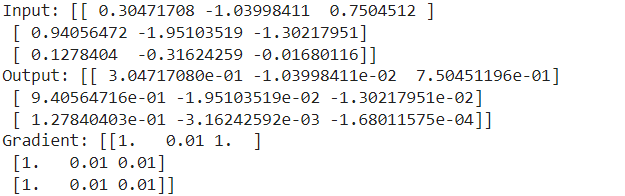

## [5 Points] Part B - Tanh Activation Function

The tanh activation function and its derivative are defined as follows:
$$ tanh (z) = \frac{e^z - e^{-z}}{e^z + e^{-z}} \tag{3.1} $$

$$ tanh^{\prime} (z) = 1 - tanh(z)^2 \tag{3.2} $$

**Hint: Use the np.tanh(x) function**

In [20]:
#TODO: Implement the Tanh class which implements the Tanh activation function.
class Tanh:
  """
  Implements the Tanh activation
  """
  def forward(self, x):
      # Write your code here
      # Hint: Use np.tanh
      # Refer to equation (3.1)
      numer = np.subtract(np.exp(x), np.exp(-x))
      denom = np.add(np.exp(x), np.exp(-x))
      return np.divide(numer, denom)


  def backward(self, x):
      # Write your code here
      # Hint: Use np.tanh
      # Refer to equation (3.2)
      return 1 - np.square(np.tanh(x))


In [22]:
# DO NOT EDIT
# Test Case to Check Tanh
rng = np.random.default_rng(42)
input = rng.normal(size=(3,3))
th = Tanh()
print(f"Input: {input}")
output =th.forward(input)
print(f"Output: {output}")
assert np.allclose(output,np.array([[ 0.29562343, -0.77788179,  0.63541805],[ 0.7354816 , -0.96039983, -0.86228318],[ 0.12714849, -0.30610551, -0.01679958]]))
grad = th.backward(input)
print(f"Gradient: {grad}")
assert np.allclose(grad,np.array([[0.91260679, 0.39489992, 0.5962439 ],[0.45906681, 0.07763216, 0.25646771],[0.98383326, 0.90629941, 0.99971777]]))

Input: [[ 0.30471708 -1.03998411  0.7504512 ]
 [ 0.94056472 -1.95103519 -1.30217951]
 [ 0.1278404  -0.31624259 -0.01680116]]
Output: [[ 0.29562343 -0.77788179  0.63541805]
 [ 0.7354816  -0.96039983 -0.86228318]
 [ 0.12714849 -0.30610551 -0.01679958]]
Gradient: [[0.91260679 0.39489992 0.5962439 ]
 [0.45906681 0.07763216 0.25646771]
 [0.98383326 0.90629941 0.99971777]]


The expected output is as follows:

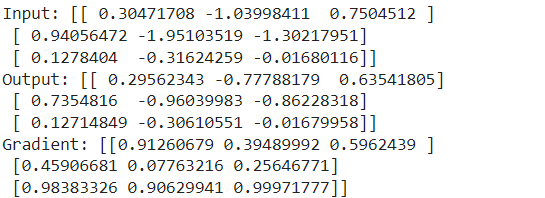

# [20 Points ] Task 03 - Dense Layer

**In this task, you are provided with a partial implementation of the `DenseLayer` class. Your are required  to complete the class by filling in the missing code blocks.**



1. **Initialization (`__init__` method)**:
- Set the weight matrix (`self.weights`) using Xavier initialization i.e. $$ W \sim N(0,2/(input\_dim+output\_dim)) \tag{3.1} $$
where $input\_dim$ is the number of input neurons and $output\_dim$ is the number of output neurons.
- Initialize the bias vector (`self.bias`) with zeros.
- Assign the appropriate activation function based on the given activation parameter.
2. **Forward Pass (`forward` method):**
- Calculate the linear transformation which is defined as follows:
$$ z = \langle XW \rangle+b \tag{3.2}$$
$$ a = \sigma(z) \tag{3.3}$$
where $W$ represents `self.weights`, $b$ represents `self.bias`, $X$ represents input, $\sigma$ denotes the activation function, and $\langle \rangle$ represents dot product (`np.dot`)
- In case, no activation function is specified:
$$ a = z \tag{3.4}$$
3. **Backward Pass (`backward` method):**
- Compute `d_z`,`d_activation`, `d_input`, `d_weights` and `d_bias`
- `d_activation` represents the derivative of the activation function $(\delta_{activation} )$
- `d_z` represents the derivative of the loss function $J$ with respect to the weighted sum before applying an activation function. $(\delta_z)$
$$ \delta_z = \delta_{output} \odot \delta_{activation} \tag{3.5} $$
where $\odot$ represents elementwise multiplication (hadmard product)
- In case, no activation function was applied:
$$ \delta_z = \delta_{output}\tag{3.6} $$
- `d_input` represents the derivative of the loss function $J$ with respect to input  $(\delta_{input} )$
$$\delta_{input}  = \langle \delta_z, W.T \rangle \tag{3.7} $$
where $W$ represents `self.weights` and $\langle \rangle$ denotes dot product
- `d_weights` represents the derivative of the loss function $J$ with respect to weights  $(\delta_{weights} )$
$$\delta_{weights}  = \langle X.T, \delta_z \rangle  \tag{3.8}$$
where $X$ represents `self.input` and $\langle \rangle$ denotes dot product
- `d_bias` represents the derivative of the loss function $J$ with respect to bias  $(\delta_{bias} )$
$$\delta_{bias}  = \sum_{i} \delta_z  \tag{3.9}$$


In [23]:
#TODO: Complete the class DenseLayer
class DenseLayer:
    def __init__(self, input_dim, output_dim, activation):
        # Refer to equation (3.2)
        # Hint: Use np.random.normal
        self.weights = np.random.normal(0, np.sqrt(2/(input_dim + output_dim)), (input_dim, output_dim))
        # Hint: Use np.zeros
        self.bias = np.zeros((output_dim))

        if activation == 'leakyrelu':
            self.activation = LeakyReLU()
        elif activation == 'tanh':
            self.activation = Tanh()
        elif activation == 'linear':
            # Linear activation (no activation)
            self.activation = None
        else:
            raise ValueError("Unsupported activation function")

    def forward(self, x):
        self.input = x
        # Refer to equation (3.2)
        self.z = np.dot(x, self.weights) + self.bias

        if self.activation:
            # Refer to equation (3.3)
            self.output = self.activation.forward(self.z)
        else:
            # No activation (linear)
            # Refer to equation (3.4)
            self.output = self.z

        return self.output

    def backward(self, d_output):
        if self.activation:
            d_activation =  self.activation.backward(self.z)
            # Refer to equation (3.5)
            d_z = d_output * d_activation
        else:
            # Refer to equation (3.6)
            d_z = d_output

        # Refer to equation (3.7)
        d_input = np.dot(d_z, self.weights.T)
        # Refer to equation (3.8)
        d_weights = np.dot(self.input.T, d_z)
        # Refer to equation (3.9)
        d_bias = np.sum(d_z, axis=0)

        return d_input, d_weights, d_bias



In [24]:
# DO NOT EDIT
# Test code for checking function
# Initialise Layer
D = DenseLayer(3,5,'tanh')
# Expected output
print(f'Weights shape {D.weights.shape}\nBias shape {D.bias.shape}\nActivation {D.activation}')
# Check dimensions
assert D.weights.shape == (3,5) and D.bias.shape == (5,)
rng = np.random.default_rng(42)
# Define sample input
sample_x = rng.normal(3,3,size=(2,3))
# Compute forward pass
sample_output = D.forward(sample_x)
# Expected ouput
print(f'Input shape {sample_x.shape}\nOutput shape {sample_output.shape}')
assert sample_output.shape == (2,5)
# Define sample grad
sample_grad = rng.normal(3,3,size=(2,5))
# Compute backward_pass
sample_d_input,sample_d_weights,sample_d_bias = D.backward(sample_grad)
print(f'Grad Input shape {sample_d_input.shape}\nGrad Output shape {sample_d_weights.shape}\nGrad Bias shape {sample_d_bias.shape}')
assert sample_d_input.shape == (2,3)
assert sample_d_weights.shape == (3,5)
assert sample_d_bias.shape == (5,)

Weights shape (3, 5)
Bias shape (5,)
Activation <__main__.Tanh object at 0x74a1909bfd40>
Input shape (2, 3)
Output shape (2, 5)
Grad Input shape (2, 3)
Grad Output shape (3, 5)
Grad Bias shape (5,)


The expected output is as follows. Since the actual values might differ due to randomness, the expected output includes dimensions.

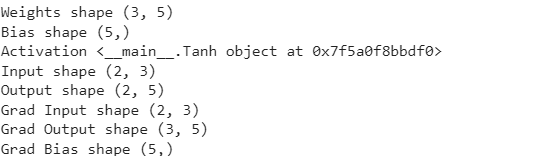

#[10 Points] Task 04 - AdamOptimizer

**In this task, you are provided with a partial implementation of the `AdamOptimizer` class. Your are required to complete the class by filling in the missing code blocks.**

In the `apply_gradients` method, for each parameter $i$:
- Calculate the fist moment estimate:
$$ m_i = \beta_1 \times m_i + (1 -\beta_1) \times grads_{i}  \tag {4.1}$$
- Calculate the second moment estimate:
$$ v_i = \beta_2 \times v_i + (1 -\beta_2) \times (grads_{i})^2 \tag {4.2} $$
- Compute the bias-corrected first moment estimate:
$$ \hat{m}_i = \frac{m_i}{1-\beta_{1}^{t}} \tag{4.3} $$
- Compute the bias-corrected second moment estimate:
$$ \hat{v}_i = \frac{v_i}{1-\beta_{2}^{t}} \tag{4.4} $$
- Update the parameter:
$$ \theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \tag{4.5} \hat{m}_t $$



In [27]:
#TODO: Complete the class AdamOptimizer
class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-7):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.m_hat = None
        self.v = None
        self.v_hat = None
        self.t = 0

    def apply_gradients(self, params, grads):
        if self.m is None:
            self.m = [np.zeros(param.shape) for param in params]
            self.m_hat = [np.zeros(param.shape) for param in params]
            self.v = [np.zeros(param.shape) for param in params]
            self.v_hat = [np.zeros(param.shape) for param in params]
        self.t += 1

        for i in range(len(params)):
            # Refer to equation (4.1)
            self.m[i] = (self.beta1 * self.m[i]) + ((1 - self.beta1) * grads[i])
            # Refer to equation (4.2)
            self.v[i] = (self.beta2 * self.v[i]) + ((1 -self.beta2) * np.square(grads[i]))
            # Refer to equation (4.3)
            self.m_hat[i] = self.m[i]/(1 - self.beta1**self.t)
            # Refer to equation (4.4)
            self.v_hat[i] = self.v[i]/(1 - self.beta2**self.t)
            # Refer to equation (4.5)
            params[i] -= (self.learning_rate * self.m_hat[i])/(np.sqrt(self.v_hat[i]) + self.epsilon)

In [28]:
# DO NOT EDIT
# Test code for checking function
rng = np.random.default_rng(42)
test_params = [rng.normal(0,1,size=(i,i)) for i in range(2,4)]
test_params_cp = test_params[:]
test_grad = [rng.normal(1,1,size=(i,i)) for i in range(2,4)]
ad = AdamOptimizer()
ad.apply_gradients(test_params,test_grad)
result_params = [np.array([[ 0.30371708, -1.04098411],[ 0.7494512 ,  0.93956472]]), np.array([[-1.95203519, -1.30317951,  0.1268404 ],[-0.31724259, -0.01780116, -0.85404393],[ 0.87839797,  0.77679194,  0.0650307 ]])]
for res,test,grad,i in zip(test_params_cp,result_params,test_grad,range(0,2)):
  print(f'Parameter {i}: {res}\nGradient: {grad}\nResult{test}')
for res,test in zip(test_params,result_params):
  assert np.allclose(res,test)

Parameter 0: [[ 0.30371708 -1.04098411]
 [ 0.7494512   0.93956472]]
Gradient: [[2.12724121 1.46750934]
 [0.14070754 1.36875078]]
Result[[ 0.30371708 -1.04098411]
 [ 0.7494512   0.93956472]]
Parameter 1: [[-1.95203519 -1.30317951  0.1268404 ]
 [-0.31724259 -0.01780116 -0.85404393]
 [ 0.87839797  0.77679194  0.0650307 ]]
Gradient: [[0.0411174  1.8784503  0.95007409]
 [0.81513764 0.31907046 2.22254134]
 [0.84547052 0.57167218 0.64786645]]
Result[[-1.95203519 -1.30317951  0.1268404 ]
 [-0.31724259 -0.01780116 -0.85404393]
 [ 0.87839797  0.77679194  0.0650307 ]]


The expected output is as follows:

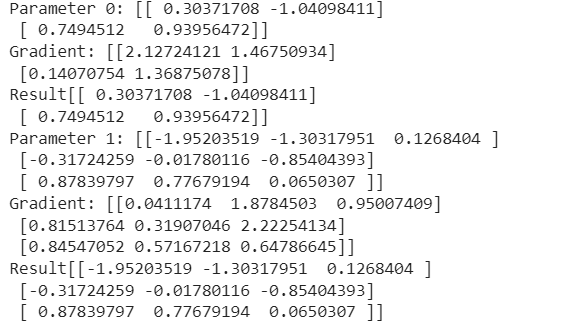

# [10 Points] Task 05 - MultiLayerPerceptron

**In this task, you are provided with a partial implementation of the `MLP` class. Your are required to complete the class by filling in the missing code blocks.**

In [29]:
#TODO: Complete the class MLP
class MLP:
  def __init__(self, input_dim, hidden_units, output_dim):
      self.layers = []
      activations = ['tanh', 'leakyrelu', 'leakyrelu']
      for units, activation in zip(hidden_units, activations):
          # Initialise the Dense Layer object in which the input neurons are equal to input_dim and output_neurons are equal to units
          # Also specify the activation function
          self.layers.append(DenseLayer(input_dim, units, activation))
          # Update input_dim for the next layer
          input_dim = units
      # Initialise the Output Layer object in which the input neurons are equal to input_dim and output_neurons are equal to output_dim
      # Also specify the activation function as linear
      self.layers.append(DenseLayer(input_dim, output_dim, 'linear'))

  def forward(self, x):
      for layer in self.layers:
          # Apply forward pass on the layer using the forward method
          x = layer.forward(x)
      return x
  def backward(self, d_output):
      weights_list = []
      bias_list = []
      for layer in reversed(self.layers):
          # Apply backwrd pass on the layer using the forward method
          d_output, d_weights, d_bias = layer.backward(d_output)
          weights_list.append(d_weights)
          bias_list.append(d_bias)
      return weights_list, bias_list

In [30]:
# DO NOT EDIT
# Test Case for checking function
# Initialise Multi Layer Perceptron
m  = MLP(3,[8, 4, 2],1)
# Define Weights shape
weights_shape = [(3,8),(8,4),(4,2),(2,1)]
# Define Bias shape
bias_shape = [(8,),(4,),(2,),(1,)]
# Expected output
for l,w_shape,b_shape in zip(m.layers,weights_shape,bias_shape):
  print(f'Weights Shape: {l.weights.shape}\nBias Shape: {l.bias.shape}\nActivation: {l.activation}')

# Checking dimensions are appropriate
for l,w_shape,b_shape in zip(m.layers,weights_shape,bias_shape):
  assert w_shape == l.weights.shape
  assert b_shape == l.bias.shape


# Define sample input
sample_input = rng.normal(3,3,size=(5,3))
# Apply forward pass
sample_result = m.forward(sample_input)
# Expected output
for inp,res in zip(sample_input,sample_result):
  print(f'Input Shape: {inp.shape}\nResult Shape: {res.shape}')
# Checking dimensions are appropriate
assert len(sample_result) == 5

# Define sample_gradient
sample_grad = rng.normal(3,3,size=(5,1))
# Compute Backward Pass
weights_grad_list, bias_grad_list = m.backward(sample_grad)

# Expected Output
for grad_w,grad_b in zip(weights_grad_list,bias_grad_list):
 print(f'Grad Weights Shape: {grad_w.shape}\nGrad Bias Shape: {grad_b.shape}')

# Checking dimensions are appropriate
for grad_w,grad_b,w_shape,b_shape in zip(weights_grad_list,bias_grad_list,weights_shape[::-1],bias_shape[::-1]):
  print(grad_w.shape,grad_b.shape,w_shape,b_shape)
  assert grad_w.shape == w_shape
  assert grad_b.shape == b_shape

Weights Shape: (3, 8)
Bias Shape: (8,)
Activation: <__main__.Tanh object at 0x74a19078c920>
Weights Shape: (8, 4)
Bias Shape: (4,)
Activation: <__main__.LeakyReLU object at 0x74a19078e480>
Weights Shape: (4, 2)
Bias Shape: (2,)
Activation: <__main__.LeakyReLU object at 0x74a19078d370>
Weights Shape: (2, 1)
Bias Shape: (1,)
Activation: None
Input Shape: (3,)
Result Shape: (1,)
Input Shape: (3,)
Result Shape: (1,)
Input Shape: (3,)
Result Shape: (1,)
Input Shape: (3,)
Result Shape: (1,)
Input Shape: (3,)
Result Shape: (1,)
Grad Weights Shape: (2, 1)
Grad Bias Shape: (1,)
Grad Weights Shape: (4, 2)
Grad Bias Shape: (2,)
Grad Weights Shape: (8, 4)
Grad Bias Shape: (4,)
Grad Weights Shape: (3, 8)
Grad Bias Shape: (8,)
(2, 1) (1,) (2, 1) (1,)
(4, 2) (2,) (4, 2) (2,)
(8, 4) (4,) (8, 4) (4,)
(3, 8) (8,) (3, 8) (8,)


The expected output is as follows. Since the actual values might differ due to randomness, the expected output includes dimensions.

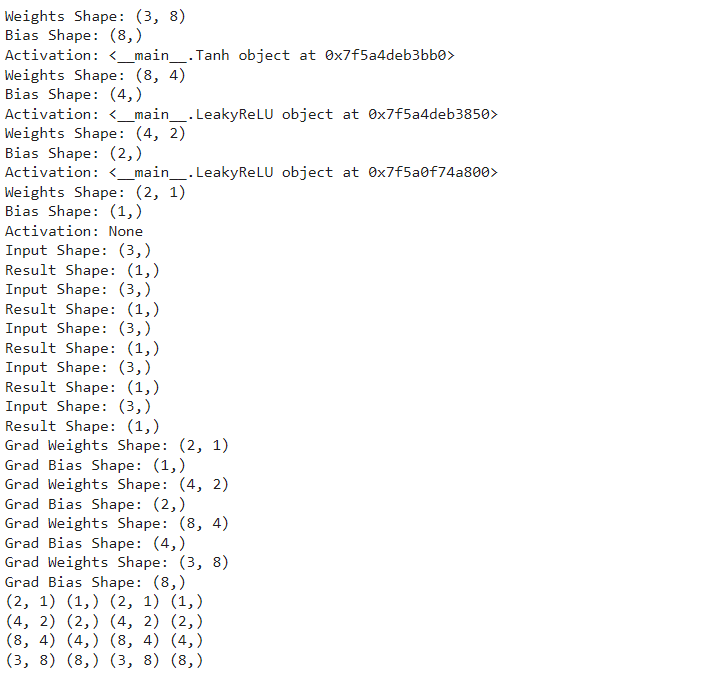

# [10 Points ] Task 06 - Create Minibatches

**In this task, you have to implement a function named `create_minibatches` that splits the feature matrix `x` and the target variable `y` into batches of size equal to `batch_size`.**

In [31]:
#TODO: Complete create_minibatches
def create_minibatches(x,y,batch_size):
 for i in range(0, x.shape[0], batch_size):
    x_batch = x[i: i + batch_size]
    y_batch = y[i: i + batch_size]
    yield x_batch,y_batch

In [32]:
# DO NOT EDIT
# Test case to check create_mini_batches
rng = np.random.default_rng(42)
input = rng.random((442,10))
output = np.arange(442)
batch = 1
for xbatch,ybatch in create_minibatches(input,output,64):
  print(f"Batch: {batch} xbatch.shape: {xbatch.shape}, ybatch.shape: {ybatch.shape}")
  if batch != 7:
    assert xbatch.shape == (64,10) and ybatch.shape == (64,)
  else:
    assert xbatch.shape == (58,10) and ybatch.shape == (58,)
  batch+=1

Batch: 1 xbatch.shape: (64, 10), ybatch.shape: (64,)
Batch: 2 xbatch.shape: (64, 10), ybatch.shape: (64,)
Batch: 3 xbatch.shape: (64, 10), ybatch.shape: (64,)
Batch: 4 xbatch.shape: (64, 10), ybatch.shape: (64,)
Batch: 5 xbatch.shape: (64, 10), ybatch.shape: (64,)
Batch: 6 xbatch.shape: (64, 10), ybatch.shape: (64,)
Batch: 7 xbatch.shape: (58, 10), ybatch.shape: (58,)


The expected output is as follows:

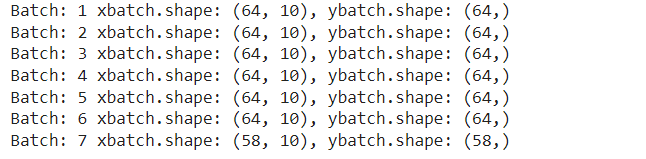

# [10 Points ] Task 07 - MSE

The Mean Squared Error is defined as following:
$$ L^{(i)} = (\mathbf{y}^{(i)} - \mathbf{\hat{y}}^{(i)})^2 \tag{7.1}$$
$$ J =\frac{1}{m} \sum_{i=1}^{m} L^{(i)} \tag{7.2}$$

where $m$ is the number of examples.

**In this task, you have to implement a function named `mean_squared_error` that computes the Mean Squared Error (MSE) between two arrays, y_hat and y where `y_hat` is the predicted value and `y` is the actual value.**





In [33]:
#TODO: Complete the function mean_squared_error
def mean_squared_error(y_hat, y):
    # Write your code here
    # Hint: Use np.mean
    # Refer to equations (7.1) & (7.2)
    return np.mean(np.square(y_hat - y))


In [34]:
# DO NOT EDIT
# Test code for checking function
y_hat = np.arange(5)
y = np.arange(5,10)
mse_result = mean_squared_error(y_hat,y)
print(f'y_hat {y_hat}, y {y}, result: {mse_result}')
assert mse_result == 25.0

y_hat [0 1 2 3 4], y [5 6 7 8 9], result: 25.0


The expected output is as follows:

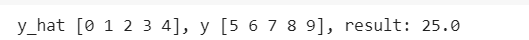

# [10 Points ] Task 08 - MSE Grad

The derivative of the Mean Squared Error with respected to the predicted value is as follows:
$$
\frac{\delta J}{\delta \hat{y}} = 2 (\hat{y} - y) \tag{8.1}
$$

**In this task, you have to implement a function named `mean_squared_error_gradient` that computes the derivative of  Mean Squared Error (MSE) between two arrays, y_hat and y where `y_hat` is the predicted value and `y` is the actual value.**

In [35]:
#TODO: Complete the function mean_squared_error_gradient
def mean_squared_error_gradient(y_hat,y):
  # Write your code here
  # Refer to equations (8.1)
  return 2*(y_hat - y)


In [36]:
# DO NOT EDIT
# Test code for checking function
y_hat = np.arange(5)
y = np.arange(5,10)
mse_grad = mean_squared_error_gradient(y_hat,y)
print(f'y_hat {y_hat}, y {y}, result: {mse_grad}')
assert np.array_equal(mse_grad,np.array([-10 ,-10 ,-10 ,-10 ,-10]))

y_hat [0 1 2 3 4], y [5 6 7 8 9], result: [-10 -10 -10 -10 -10]


The expected output is as follows:

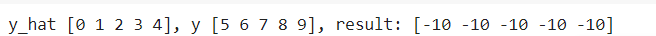

# [10 Points ] Task 09 - R2Score

The R2 score is computed as follows:

\begin{align} R^2&=1-\frac{\text{sum squared regression (SSR)}}{\text{total sum of squares (SST)}} \tag{9.1},\\ &=1-\frac{\sum({y_i}-\hat{y_i})^2}{\sum(y_i-\bar{y})^2} \tag{9.2}. \end{align}

where $y$ is the actual value, $\hat{y}$ is the predicted value and $\bar{y}$ is the mean of actual value.

**In this task, you have to implement a function named `r2_score` that computes the R2Score between two arrays, y_hat and y where `y_hat` is the predicted value and `y` is the actual value.**





In [37]:
#TODO: Complete the function r2_score
def r2_score(y_hat, y):
    #Write your code here
    #Refer to equations (9.1) & (9.2)

    # Calculate the mean of y_true
    mean_y_true = np.mean(y)

    # Calculate SSR (Sum of Squared Residuals)
    ssr = np.sum(np.square(y - y_hat))

    # Calculate SST (Total Sum of Squares)
    sst = np.sum(np.square(y - mean_y_true)) 

    # Calculate R2 score
    r2 = 1 - (ssr/sst)

    return r2

In [38]:
# DO NOT EDIT
# Test code for checking function
y_hat = np.arange(5)
y = np.arange(5,10)
r2_result = r2_score(y_hat,y)
print(f'y_hat {y_hat}, y {y}, result: {r2_result}')
assert r2_result == -11.5

y_hat [0 1 2 3 4], y [5 6 7 8 9], result: -11.5


The expected output is as follows:

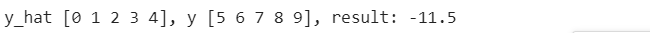

# [10 Points ] Task 10 - Fit Function

**In this task, you are required to implement the `fit` function which implements the main training loop for the model.**

In [39]:
#TODO: Complete the function which implements the training loop for the model.
def fit (X,Y,epochs=200, batch_size=64, learning_rate=0.3):
  # Split the dataset into Train and Test. test_size = 0.2 and seed=42
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,0.2,42)

  # Standardize the features
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Define the model
  input_dim = X_train.shape[1]

  hidden_units = [128, 64, 32]
  output_dim = 1

  hidden_units = [128, 64, 32]
  output_dim = 1

  model = MLP(input_dim, hidden_units, output_dim)
  optimizer = AdamOptimizer(learning_rate=0.001)

  for epoch in range(epochs):
    for x_batch,y_batch in create_minibatches(X_train,Y_train,batch_size):

      # Compute forward pass on x_batch using the forward method of model
      y_pred = model.forward(x_batch)

      # Compute loss using the mean_squared_error_function
      loss = mean_squared_error(y_pred, y_batch)

      # Compute derivative of the loss using the mean_squared_error_gradient function
      d_loss = mean_squared_error_gradient(y_pred, y_batch)

      # Compute backward pass using the backward method of the model by passing d_loss as a parameter
      d_weights, d_bias = model.backward(d_loss)


      params = [layer.weights for layer in model.layers] + [layer.bias for layer in model.layers]
      grads = d_weights[::-1] + d_bias[::-1]
      optimizer.apply_gradients(params, grads)

    if epoch % 10 == 0:
      print(f'Epoch {epoch}/{epochs}, Loss: {loss}')

  # Comput the model prediction on the X_test by using the forward method provided by model
  y_pred = model.forward(X_test)
  # Compute test mse using the mean_squared_error_function, y_pred and Y_test
  mse = mean_squared_error(y_pred, Y_test)
  print(f'Mean Squared Error (MSE): {mse}')
  # Compute test mse using the mean_squared_error_function, y_pred and Y_test
  r2 = r2_score(y_pred, Y_test)
  print(f'R-Squared (R^2) Score: {r2:.2f}')

fit(X,Y)

Epoch 0/200, Loss: 24603.382337311665
Epoch 10/200, Loss: 16147.465676081818
Epoch 20/200, Loss: 3949.296830336809
Epoch 30/200, Loss: 2839.972624640326
Epoch 40/200, Loss: 2287.8900373968895
Epoch 50/200, Loss: 2217.0852539241787
Epoch 60/200, Loss: 2190.3262857338673
Epoch 70/200, Loss: 2152.435324980979
Epoch 80/200, Loss: 2110.0572906644366
Epoch 90/200, Loss: 2069.843686522083
Epoch 100/200, Loss: 2033.2787268550865
Epoch 110/200, Loss: 2004.411379064674
Epoch 120/200, Loss: 1975.2454819073087
Epoch 130/200, Loss: 1946.0873067345092
Epoch 140/200, Loss: 1915.1928502140554
Epoch 150/200, Loss: 1881.7118220096852
Epoch 160/200, Loss: 1851.3329845857954
Epoch 170/200, Loss: 1817.3920137905466
Epoch 180/200, Loss: 1788.8850880183065
Epoch 190/200, Loss: 1761.3692463744328
Mean Squared Error (MSE): 3292.2589701010847
R-Squared (R^2) Score: 0.48


The expected output is as follows. However, your output might sligtly differ due to randomness.

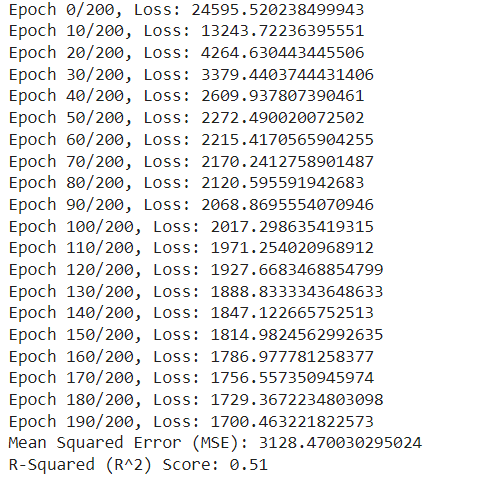